# READING DATA

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


# DATA VISUALIZATION

Calculating text message length

In [2]:
data['body_len'] = data['body_text'].apply(lambda x:len(x)-x.count(' '))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


Calculation punctuation %

In [3]:
import string

def punct_perc(body):
    count = sum([1 for word in body if word in string.punctuation])
    percent = round(count/(len(body)-body.count(' ')),3)*100
    return percent

data['punct_%'] = data['body_text'].apply(lambda x:punct_perc(x))
data.head()

,label,body_text,body_len,punct_%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


## Plotting the New Features

In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

Text Message Length Distribution

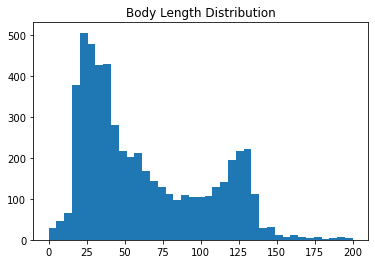

In [5]:
bins = np.linspace(0,200,40)

pyplot.hist(data['body_len'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

Punctuation % Distribution

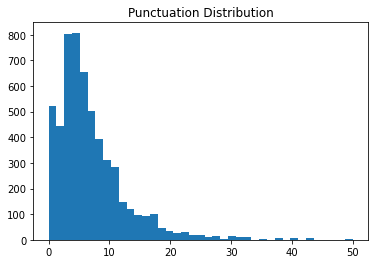

In [6]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct_%'],bins)
pyplot.title("Punctuation Distribution")
pyplot.show()

## Analyzing the New Features

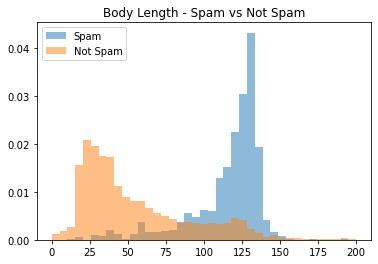

In [7]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5,density=True,label='Spam')
pyplot.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5,density=True,label='Not Spam')
pyplot.legend(loc='upper left')
pyplot.title("Body Length - Spam vs Not Spam")
pyplot.show()

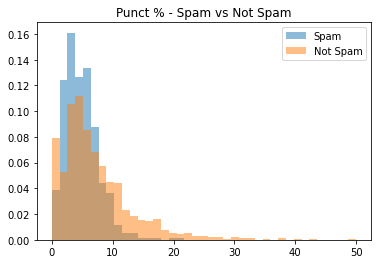

In [8]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['punct_%'],bins,alpha=0.5,density=True,label='Spam')
pyplot.hist(data[data['label']=='ham']['punct_%'],bins,alpha=0.5,density=True,label='Not Spam')
pyplot.legend(loc='upper right')
pyplot.title("Punct % - Spam vs Not Spam")
pyplot.show()

# CLEANING TEXT

In [9]:
import nltk
import re

Removing Punctuation, Tokenization, Stemming

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [11]:
def cleaning_message(text):
    nopunct = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenz = re.split('\W+',nopunct)
    stem = [ps.stem(word) for word in tokenz]
    nostop = [word for word in stem if word not in stopwords]
    return nostop

# SPLIT TRAIN TEST 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data[['body_text','body_len','punct_%']],data['label'],test_size=0.2)

# VECTORIZING

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfid_vect = TfidfVectorizer(analyzer=cleaning_message)
tfid_vect_fit = tfid_vect.fit(X_train['body_text'])


tfid_Xtrain = tfid_vect_fit.transform(X_train['body_text'])
tfid_Xtest = tfid_vect_fit.transform(X_test['body_text'])

In [16]:
X_train_vect = pd.concat([X_train[['body_len','punct_%']].reset_index(drop=True),
                         pd.DataFrame(tfid_Xtrain.toarray())],axis=1)
X_test_vect = pd.concat([X_test[['body_len','punct_%']].reset_index(drop=True),
                         pd.DataFrame(tfid_Xtest.toarray())],axis=1)

In [17]:
X_train_vect.head()

,body_len,punct_%,0,1,2,3,4,5,6,7,...,7136,7137,7138,7139,7140,7141,7142,7143,7144,7145
0,24,8.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,3.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,7.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71,2.8,0.173774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test_vect.head()

,body_len,punct_%,0,1,2,3,4,5,6,7,...,7136,7137,7138,7139,7140,7141,7142,7143,7144,7145
0,124,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL EVALUATION

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [20]:
rf = RandomForestClassifier(n_estimators=150,max_depth=None,n_jobs=-1)

rf_model = rf.fit(X_train_vect,y_train)
y_pred_rf = rf_model.predict(X_test_vect)
y_pred_rf

array(['spam', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [21]:
precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='spam',average='binary')
print('Model Evaluation - Random Forest \nPrecision: {} | Recall: {} | fscore: {} | Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round(((y_pred_rf==y_test).sum()/len(y_pred_rf)),3)))

Model Evaluation - Random Forest 
Precision: 1.0 | Recall: 0.757 | fscore: 0.862 | Accuracy: 0.968


### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [23]:
gb = GradientBoostingClassifier(n_estimators=150,max_depth=11)

gb_model = gb.fit(X_train_vect,y_train)
y_pred_gb = gb_model.predict(X_test_vect)
y_pred_gb

array(['spam', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [24]:
precision, recall, fscore, support = score(y_test, y_pred_gb, pos_label='spam',average='binary')
print('Model Evaluation - Gradient Boosting \nPrecision: {} | Recall: {} | fscore: {} | Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round(((y_pred_gb==y_test).sum()/len(y_pred_gb)),3)))

Model Evaluation - Gradient Boosting 
Precision: 0.916 | Recall: 0.811 | fscore: 0.86 | Accuracy: 0.965
